# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [50]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [51]:
symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Include dividends? (If yes, set to True)

In [52]:
use_adj = True

Define high low trade periods

In [53]:
sma_period = 200
percent_band = 3.5

Run Strategy

In [54]:
s = strategy.Strategy(symbol, capital, start, end, use_adj, sma_period, percent_band)
s.run()

Retrieve log DataFrames

In [55]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [56]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
1,1994-08-26,29.49,1998-08-31,64.18,34.69,11274.33,325,10862.24,LONG,SPY
2,1998-11-02,75.06,1999-10-15,84.76,9.70,2686.09,277,13548.32,LONG,SPY
3,1999-10-29,92.99,2000-10-10,94.38,1.39,352.13,253,13900.45,LONG,SPY
4,2003-04-22,64.88,2007-11-21,109.00,44.13,16238.76,368,30139.20,LONG,SPY
5,2009-06-05,75.43,2010-06-07,85.84,10.42,5541.00,532,35680.20,LONG,SPY
6,2010-09-24,94.38,2011-08-04,100.30,5.92,2864.27,484,38544.47,LONG,SPY
7,2012-01-10,108.94,2015-08-21,179.10,70.16,31222.77,445,69767.24,LONG,SPY
8,2016-04-01,190.40,2018-10-29,254.83,64.42,26928.83,418,96696.07,LONG,SPY
9,2019-03-18,275.46,2020-03-09,271.43,-4.03,-1560.41,387,95135.66,LONG,SPY
10,2020-06-03,310.81,2020-09-02,357.70,46.89,15848.07,338,110983.73,LONG,SPY


In [57]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-08-27,118347.33,117208.27,117816.66,338,81.13,1.00,-
2020-08-28,118624.49,117755.83,118577.16,338,81.13,1.00,-
2020-08-31,118820.52,118063.41,118147.91,338,81.13,1.00,-
2020-09-01,119297.11,118124.24,119259.93,338,81.13,1.00,-
2020-09-02,120983.73,120983.73,120983.73,0,120983.73,1.00,X


Generate strategy stats - display all available stats

In [58]:
pf.print_full(stats)

start                                                   1993-11-11
end                                                     2020-09-02
beginning_balance                                            10000
ending_balance                                           120983.73
total_net_profit                                         110983.73
gross_profit                                             112956.24
gross_loss                                                -1972.51
profit_factor                                                57.27
return_on_initial_capital                                  1109.84
annual_return_rate                                            9.75
trading_period                           26 years 9 months 22 days
pct_time_in_market                                           75.32
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [59]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end, s.use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  355 SPY @ 28.14
2020-09-02 00:00:00 SELL 355 SPY @ 357.70


Plot Equity Curves: Strategy vs Benchmark

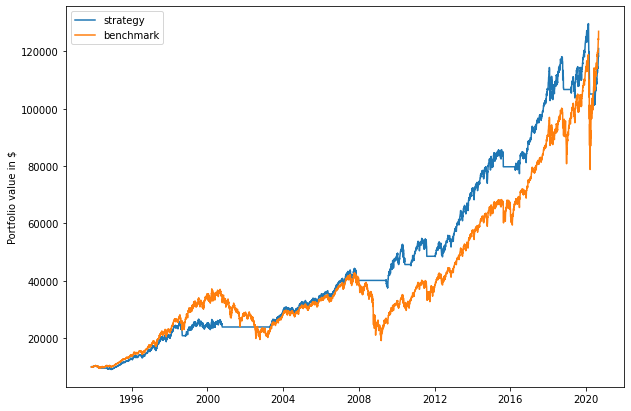

In [60]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

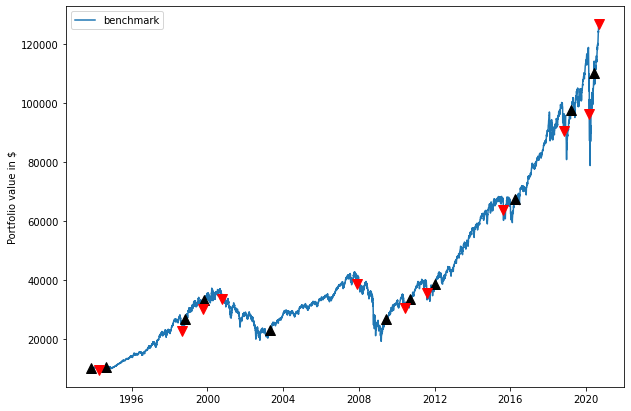

In [61]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

In [62]:
print('trading period:  {} to {}'.format(stats['start'], stats['end']))
df = pf.summary(stats, benchmark.stats, metrics=pf.currency_metrics)
df

trading period:  1993-11-11 to 2020-09-02


,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$120,983.73","$126,994.44"
total_net_profit,"$110,983.73","$116,994.44"
gross_profit,"$112,956.24","$116,994.44"
gross_loss,"-$1,972.51",$0.00


Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,9.75,9.94
max_closed_out_drawdown,-21.94,-55.18
drawdown_annualized_return,-2.25,-5.55
drawdown_recovery,-0.31,-1.42
best_month,15.45,23.61
worst_month,-18.94,-30.98
sharpe_ratio,0.81,0.59
sortino_ratio,0.89,0.75
monthly_std,3.16,4.55
annual_std,11.64,16.90


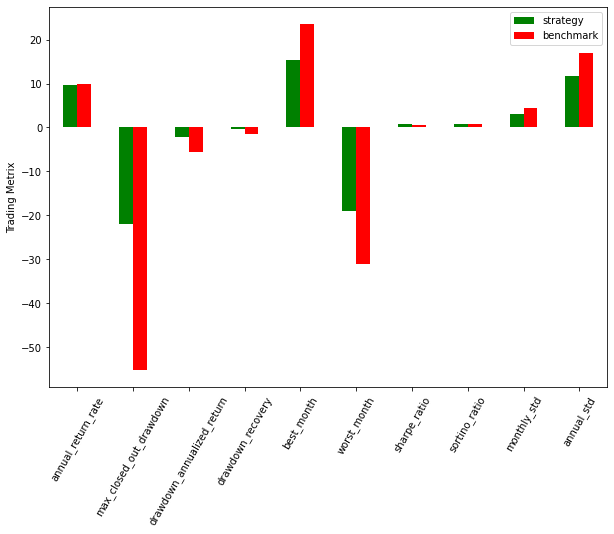

In [63]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

Print the raw transaction log

In [64]:
pd.set_option('display.max_rows', len(rlog))
rlog

,date,seq_num,price,shares,entry_exit,direction,symbol
0,1993-11-11,0,28.14,355,entry,LONG,SPY
1,1994-04-04,1,26.98,355,exit,LONG,SPY
2,1994-08-26,2,29.49,325,entry,LONG,SPY
3,1998-08-31,3,64.18,325,exit,LONG,SPY
4,1998-11-02,4,75.06,277,entry,LONG,SPY
5,1999-10-15,5,84.76,277,exit,LONG,SPY
6,1999-10-29,6,92.99,253,entry,LONG,SPY
7,2000-10-10,7,94.38,253,exit,LONG,SPY
8,2003-04-22,8,64.88,368,entry,LONG,SPY
9,2007-11-21,9,109.00,368,exit,LONG,SPY
